# Python DeCal HW 6: Plotting #


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline



## Problem 1: Random Plots

This problem in an exercise in plotting random data. First you must generate three lists of random numbers, each 40 elements long with values ranging from 0 to 100. Then make two stacked vertical subplots. The top plot should plot one list of random data in orange and with a line width of 10 and another list in red and dashed. The bottom plot should be a scatter plot of the final list with magenta diamonds as the marker. In each case the x coordinate should be the position in the list.

<img src="q1_result.png" alt="q1 result image" style="height: 400px; width:650px;"/>




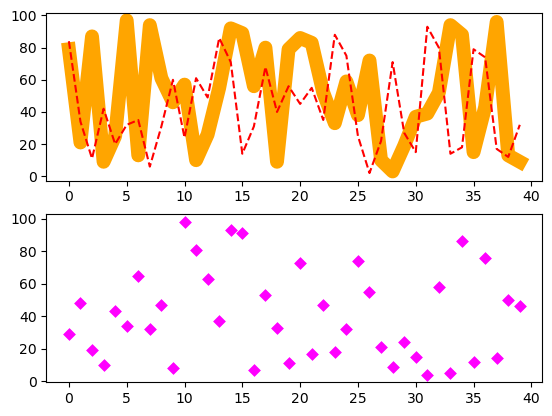

<Figure size 640x480 with 0 Axes>

In [2]:
a = np.random.randint(1,100, (1, 40))
b = np.random.randint(1,100, (1, 40))
c = np.random.randint(1,100, (1, 40))

y_axis1 = a.flatten() #.flatten() makes it into one dimension
x_axis1 = np.array([range(0,40,1)]).flatten()
y_axis2 = b.flatten()
x_axis2 = np.array([range(0,40,1)]).flatten()
y_axis3 = c.flatten()
x_axis3 = np.array([range(0,40,1)]).flatten()

fig, ax = plt.subplots(2, 1) #makes 2 subplots


ax[0].plot(x_axis2, y_axis2, color = 'orange', linewidth = 10)#plots the first 2
ax[0].plot(x_axis3, y_axis3, color = 'red', linestyle = '--' )

ax[1].scatter(x_axis1 , y_axis1, color = 'magenta', marker = 'D', linewidth=0.5) #scatter

plt.figure()
plt.show()

## Problem 2: van der Waals Gas

A Van der Waals gas is a model of gas particles that takes into account the interaction of the particles and the volume the particles take up. Like the ideal gas law, it relates pressure, volume, amount of gas and temperature. The equation is <br>
$\left(P +a\frac{n^2}{V^2}\right)(V-nb) = nRT \quad (1)$ <br>
Where $P$ is pressure, $V$ is volume, $T$ is temperature, $n$ is number of moles, $R$ is the ideal gas constant and $a,b$ are parameters. The value of $R$ is $0.083144 \frac{barL}{molK}$

Make a colormap plot of the temperature of one mole acetone for given volume and pressure. The pressure should vary between 1 and 10 bar and the volume should vary between 10 and 30 liters. For acetone $a = 16.02 \frac{barL^2}{mol^2}$ and $b = 0.1124 \frac{L}{mol}$. Make sure your axes labels have the correct values. Also make use of `vmin` and `vmax` to show detail in your color map and add a color bar to the map



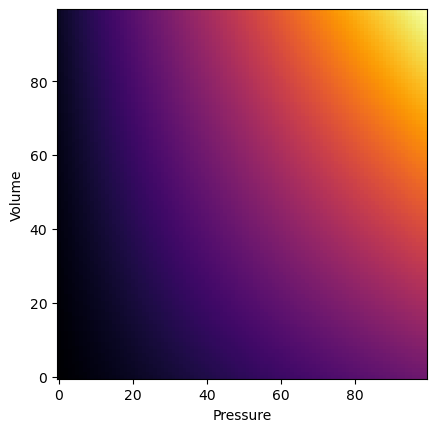

In [3]:
r = 0.083144  #constants
a = 16.02  
b = 0.1124  

x,y = np.meshgrid(np.linspace(1,10,100), np.linspace(10,30,100))#x is pressure, y is volume

f = ((x +a/y**2)*(y-b))/r #just the equation with moles = 1

plt.figure() 

#labels
plt.xlabel("Pressure")
plt.ylabel("Volume")

plt.imshow(f, cmap = 'inferno', origin = 'lower')
plt.show()



## Problem 3: Stellar Interiors ##

This problem is adapted from Astro 160

In stars, there are two main methods of energy transport: radiative diffusion (where photons move energy through gas) and convection (where hot gas and colder gas exchange places). These procecess have associated temperature gradients, describing how the temperature changes as position (radius) inside the star changes. The star can only have one true temperature gradient which sometimes aligns with the radiative (radiative diffusion) or adiabatic (convection) temperature gradient. Convection only occurs when the true temperature gradient is aligned with the adiabatic temeprature gradient.

In the files `structure1_00001.txt`, `structure5_00001.txt`, `structure4_00001.txt`, there is data on the radius and temperature gradients for stars of three different masses: $0.5 M_\odot$, $1 M_\odot$ and $4 M_\odot$ respectively. Make a figure with three subplots, half for each star. On each subplots, plot the three temperature gradients, each in a different color and line style, and change the y axis to be logarithmic scale. On these plots indicate the convection zone(s) where the true temperature gradient is much closer to the adiabatic temeprature gradient than the radiative temeprature gradient.

The files contain a lot of data, but only some of it is useful to us. Namely the second (2) column contains the radius points of the measurement, the ninth (9) column contains the adiabatic temeprature gradient, the fourteenth (14) column contains the radiative temperature gradient and the fifteenth (15) columns contains the true temperature gradient.




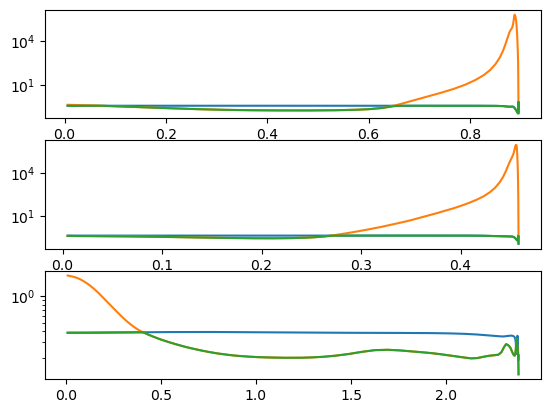

In [4]:
m = np.loadtxt('structure1_00001.txt') #loads the text

m2 = np.loadtxt('structure5_00001.txt')

m3 = np.loadtxt('structure4_00001.txt')

x = m[:,1] #radius for the x axis

x2 = m2[:, 1]

x3 = m3[:, 1]


fig, ax = plt.subplots(3, 1 )

ax[0].set(yscale = "log")#first 1
ax[0].plot(x, m[:, 10])# records 11th column etc.
ax[0].plot(x, m[:, 15])
ax[0].plot(x, m[:, 16])


ax[1].set(yscale = "log")
ax[1].plot(x2, m2[:, 10])
ax[1].plot(x2, m2[:, 15])
ax[1].plot(x2, m2[:, 16])


ax[2].set(yscale = "log")
ax[2].plot(x3, m3[:, 10])
ax[2].plot(x3, m3[:, 15])
ax[2].plot(x3, m3[:, 16])

plt.show()

## Problem 4: Monte Carlo $\pi$ ##

Did you know that we can calculate the value of $\pi$ by generating random numbers? We first generate a whole bunch of random points in a 1x1 square with the corner at the origin. Then we see how many of the points are within a distance 1 of the origin. There points all fall in a quarter of a circle centered on the origin. Then using the relation <br>
$\frac{N_{in}}{N} \approx \frac{A_{qc}}{A}$ <br>
we can calculate $\pi$ from the ratio of the areas of a quarter circle and the square.

Calculate the value of $\pi$ using this procedure for N = 1e3, 1e4, 1e5, 1e6, and print your results. Also create a plot of these points for N = 1e4. The points within the quarter circle should all be one color and the points outside should also be a different color. Also please make sure your plot is a square and put the value of pi from that run on your plot as text.



The estimation of pi using this method is:  3.096


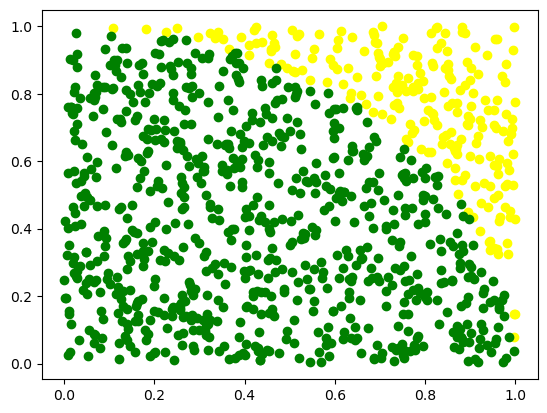

In [7]:

amount_of_data_points = 1000 #just using this as a place holder if you wanna manipulate the amount of points

x = np.random.uniform(0,1, (1, amount_of_data_points)).flatten() #random numbers
y = np.random.uniform(0,1, (1, amount_of_data_points)).flatten()

dist = np.sqrt(x**2+y**2) #finds the distance

#these are gonna be used to record which data is Outside the circle
arr = [] 
arr1 = []

#these are gonna be used to record which data is Inside the circle
ar = []
ar1 = []

for i in range(amount_of_data_points):
    
    if np.sqrt(x[i]**2+y[i]**2) > 1: #if the distance is more than 1, add these certain points to the array
        arr.append(x[i])
        arr1.append(y[i])
  
    else:#if it doesn't add to the other array
        ar.append(x[i])
        ar1.append(y[i])
    


count = 0 #need this to count how many points arent inside the circle


for i in dist:
    if i <= 1:
        count += 1

print("The estimation of pi using this method is: " , 4*count/amount_of_data_points) #equation is just 4 *N(in) / N(total)


plt.scatter(arr,arr1, color = 'yellow') # just plot for scatter
plt.scatter(ar, ar1, color = 'green')
plt.show()